# Prix de l'avocat

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet


In [2]:
sns.set(rc={"figure.figsize" : (16,9)} , font_scale=1.2)
sns.set_palette('viridis')

## chargement des données
### Le tableau ci-dessous représente les données de l'analyse hebdomadaire de la vente de l'avocat pour diffirent region

In [3]:
df = pd.read_csv('avocado.csv')

## Il y a quelques colonnes sur lesquelles nous allons nous concentrer pour cette analyse:

#### Date - La date de l'observation (2015-01 / 2018-04)
#### AveragePrice - le prix moyen d'un seul avocat
#### type - conventionnel ou organique
#### année - l'année
#### Région - la ville ou la région d'observation
#### et volume total

## la tête et la queue du cadre de données

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [5]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1


## Voyons comment le prix moyen a changé en cours des ans pour les deux types (organique et conventionnel)

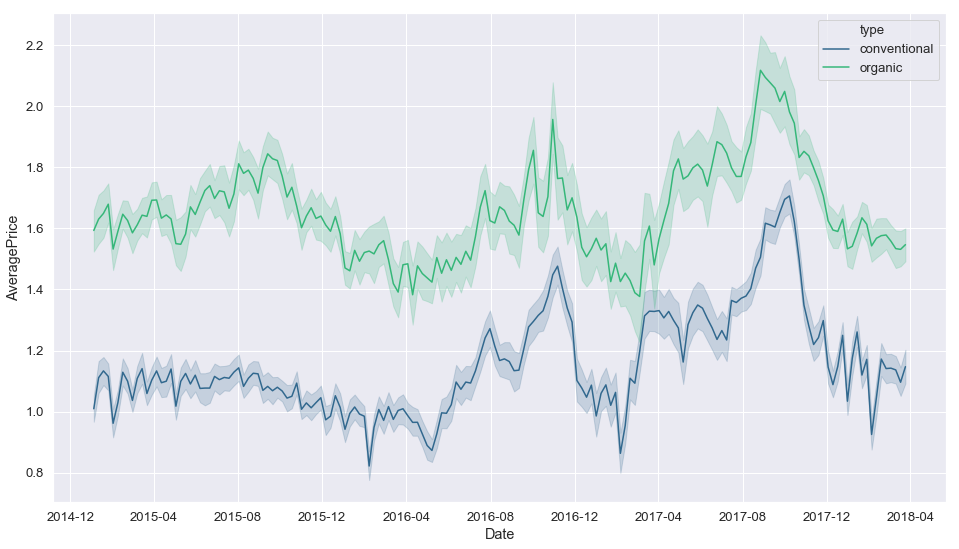

In [6]:
sns.lineplot(data=df.reset_index() , y='AveragePrice' , x="Date" , hue='type', palette='viridis',)

## Voyons comment le prix moyen a changé au cours des mois pour les deux types (organique et conventionnel)

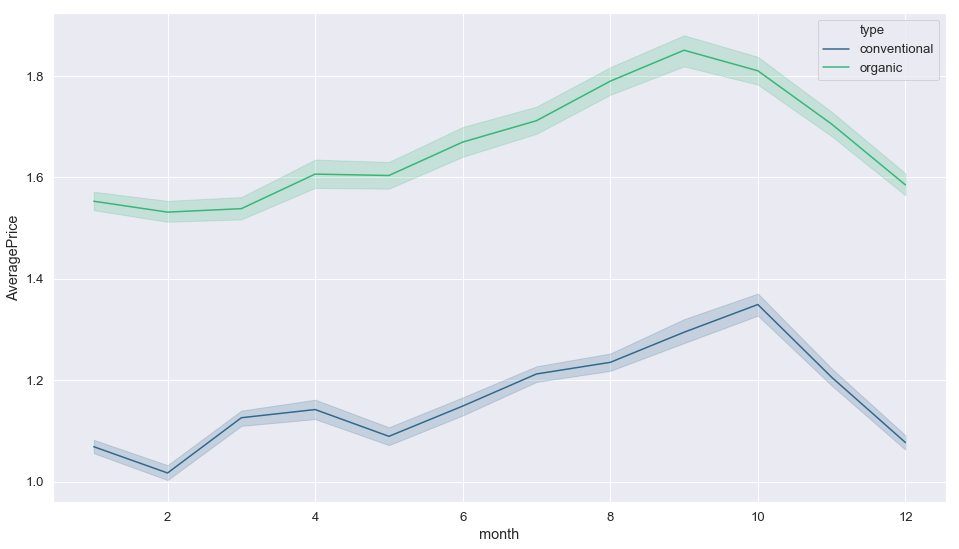

In [7]:
sns.lineplot(data=df.reset_index() , y='AveragePrice' , x="month" , hue='type' , palette='viridis',)

### nous pouvons tracer la même graph pour chaque région mais je ne ferai que les 10 premiers sinon le rapport sera trop long

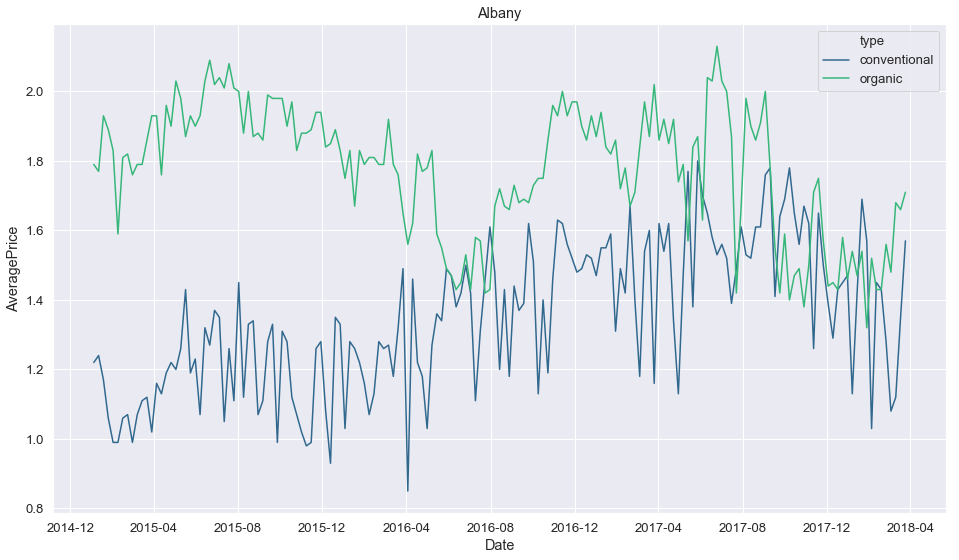

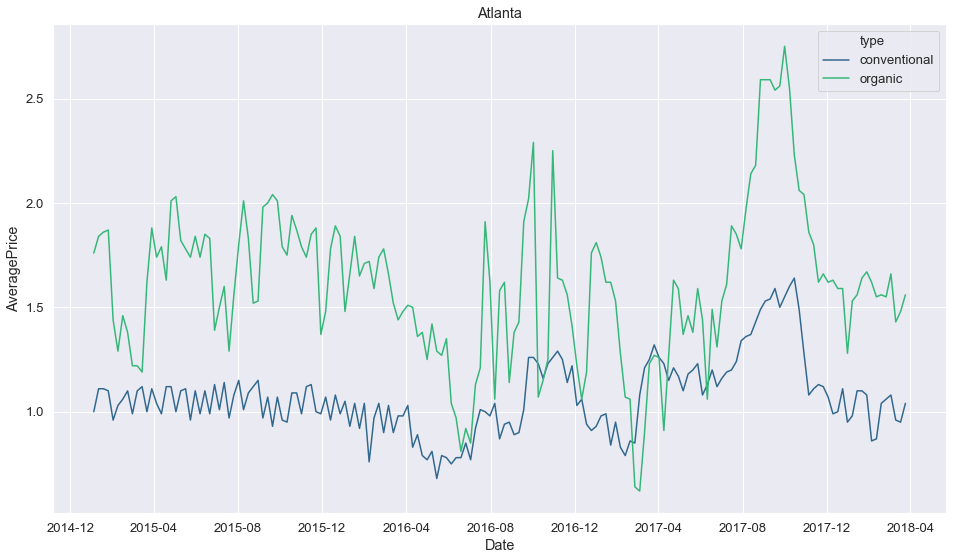

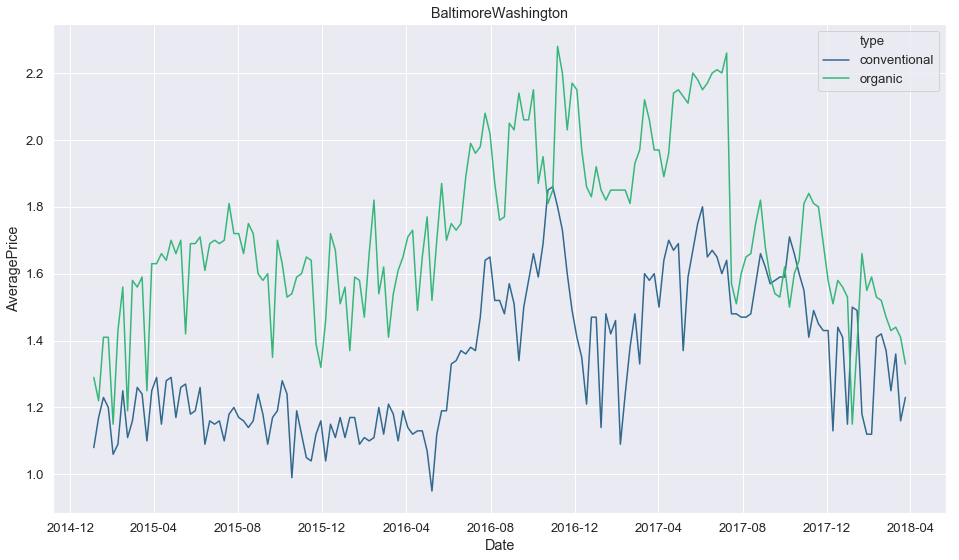

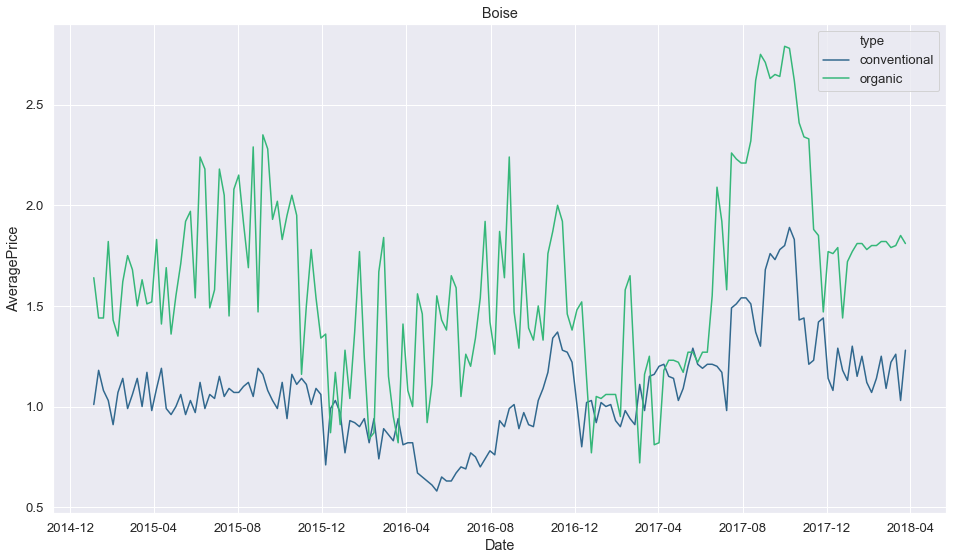

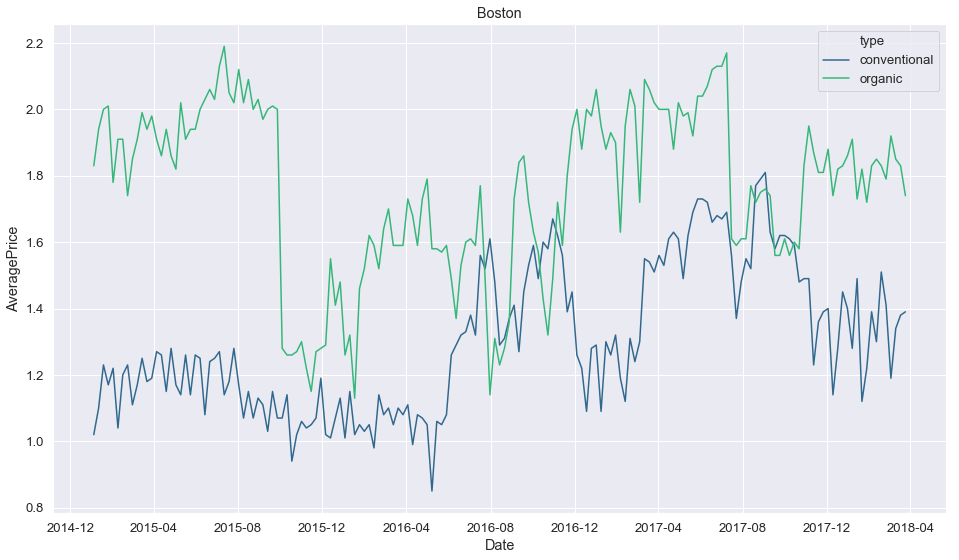

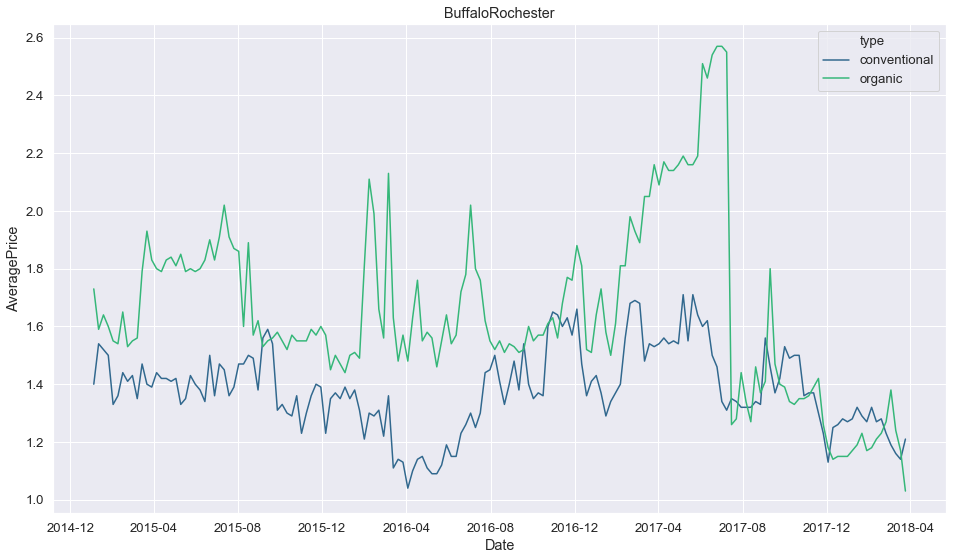

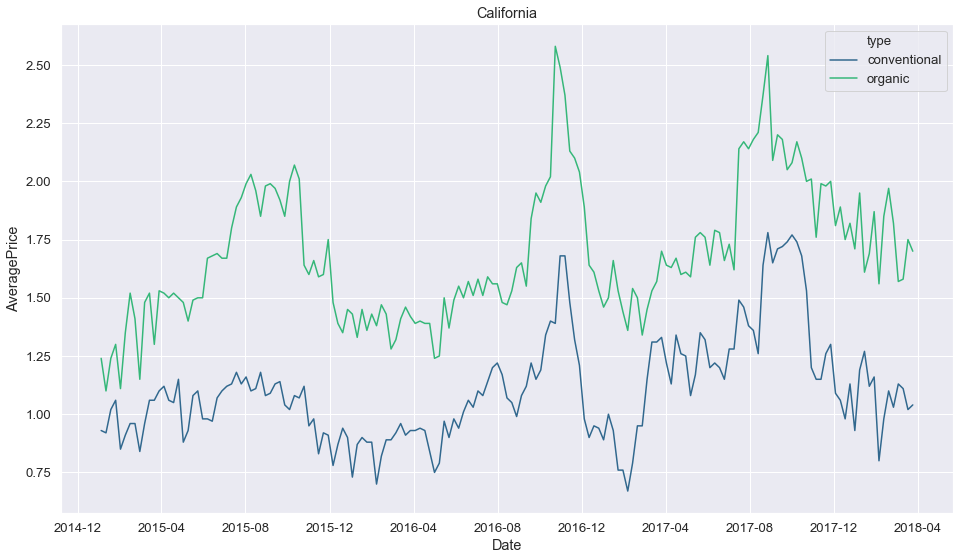

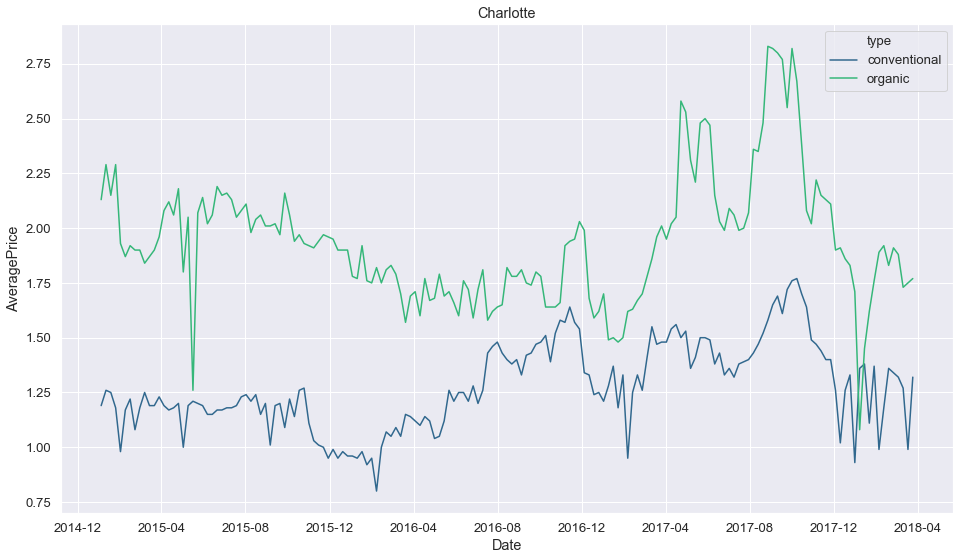

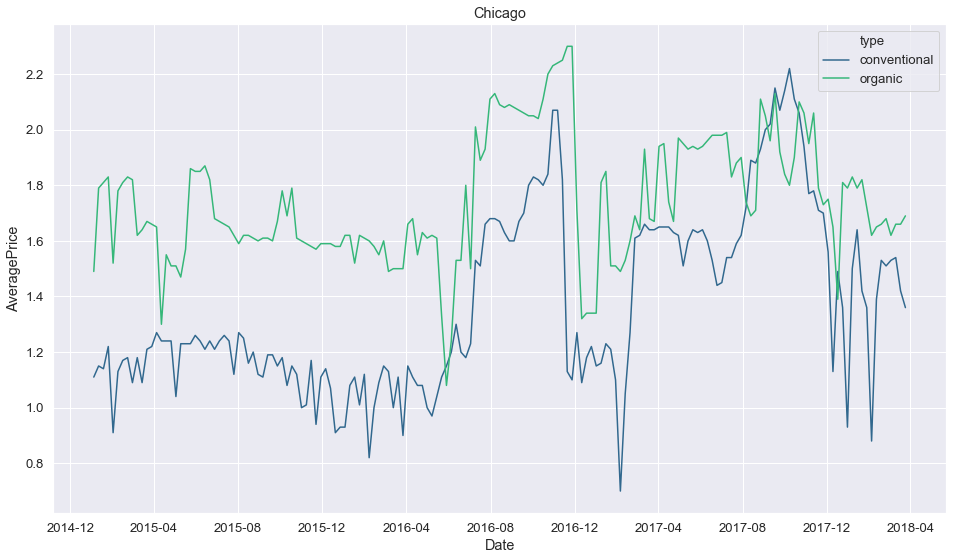

In [8]:
for region in df['region'].unique()[:9]:
    dfn = df[df['region'] == region]
    sns.lineplot(data=dfn.reset_index() , y='AveragePrice' , x="Date" , hue='type', palette='viridis',)
    plt.title(region)
    plt.show()


## une autre manière qui nous aide à comprendre comment le prix moyen de l'avocat évolue en cours des années en cas de complot violent (boxplot + kde)
### nous remarquons que le prix moyen de l'avocat bio varie beaucoup en cours des ans, nous ne jugerons pas en 2018 car nous ne disposons de données que sur 3 mois, il n'est donc pas juste de les comparer.
### Une chose à noter est que le prix moyen moyen de l'avocat conventionnel est passé de 1,1 en 2015 et 2016 à 1,3 en 2017. De plus, 50% du prix moyen en 2015 et 2016 étaient compris entre ( 0,9 - 1,3 ) , mais en 2017 il jusqu'à (1.3 - 1.52)

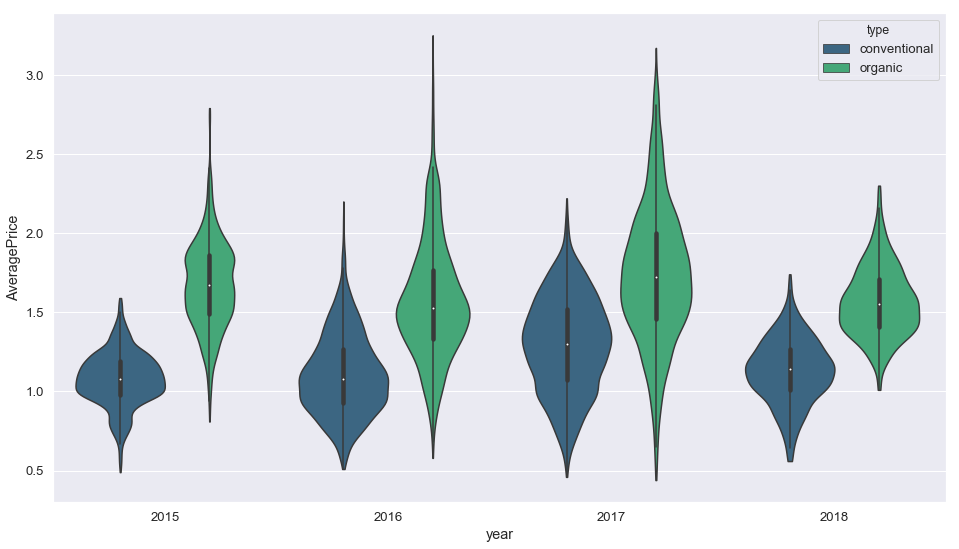

In [9]:
sns.violinplot(data=df , x="year" , y="AveragePrice" , hue="type" , cut=0 , palette='viridis',)

## ici nous pouvons comparer le prix moyen pour chaque région en 4 ans et pour  2 types

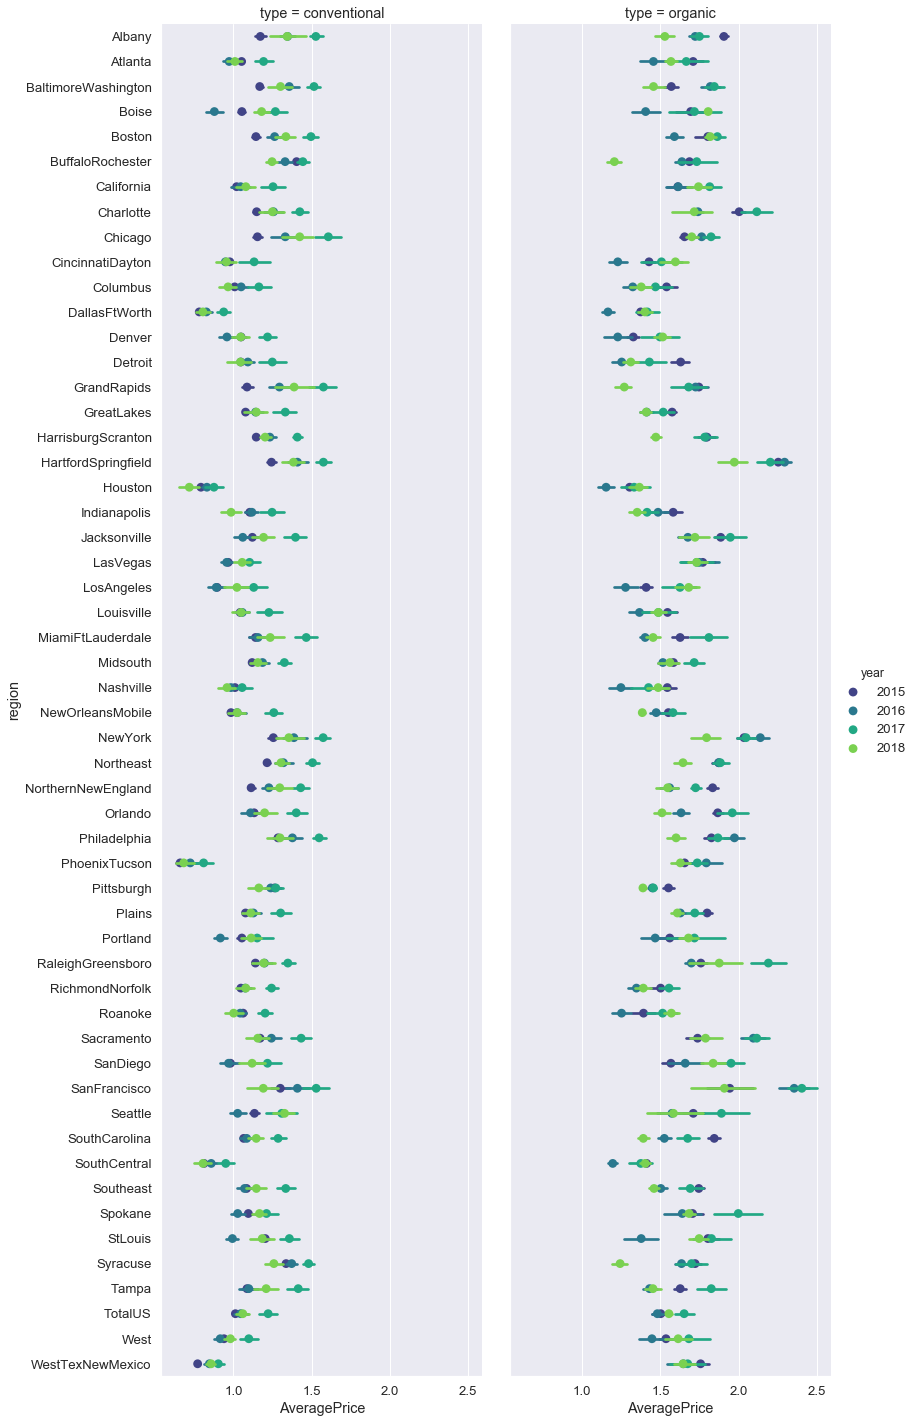

In [10]:
sns.catplot(data=df , x='AveragePrice' , y='region' , col='type' , hue='year' , kind='point' ,
            join=False ,height=20 , aspect=0.3, palette='viridis',  )

In [11]:
order_o = (df[(df['type']=='organic') & (df['year']==2018)].groupby('region').mean()['AveragePrice'].sort_values().index)
order_c = (df[(df['type']=='conventional') & (df['year']==2018)].groupby('region').mean()['AveragePrice'].sort_values().index)

## en fait la même chose mais nous avons trié selon le prix moyen du type organique pour l'année  2018

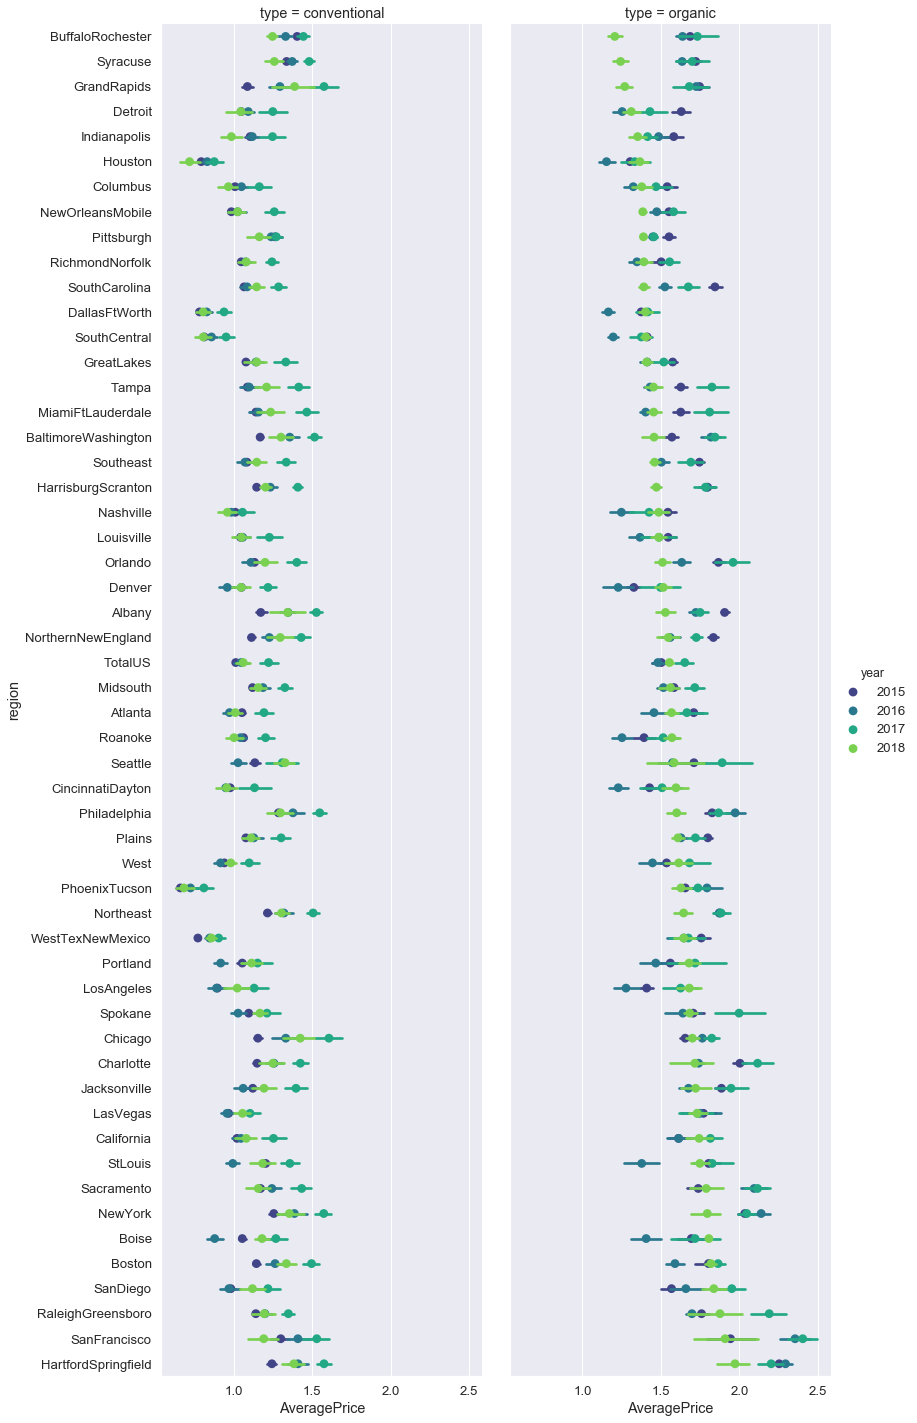

In [12]:
sns.catplot(data=df ,x='AveragePrice' , y='region' , col='type' , hue='year' , kind='point' ,
            join=False ,height=20 , aspect=0.3 , 
            order=order_o, palette='viridis', )

## ici nous avons pris les villes avec le prix moyen le plus élevé et le prix le plus bas de l'avocat bio et traçons l'évolution du prix moyen par mois
#### à Buffalo Rochester, le prix moyen en 2017 a atteint un maximum et un minimum critiques, suivis du prix le plus bas en 2018, qui équivaut à peu près au prix d'un avocat conventionnel , à Hartford Springfield, le prix des avocats biologiques en 2018 est bas comparé à celui des autres années

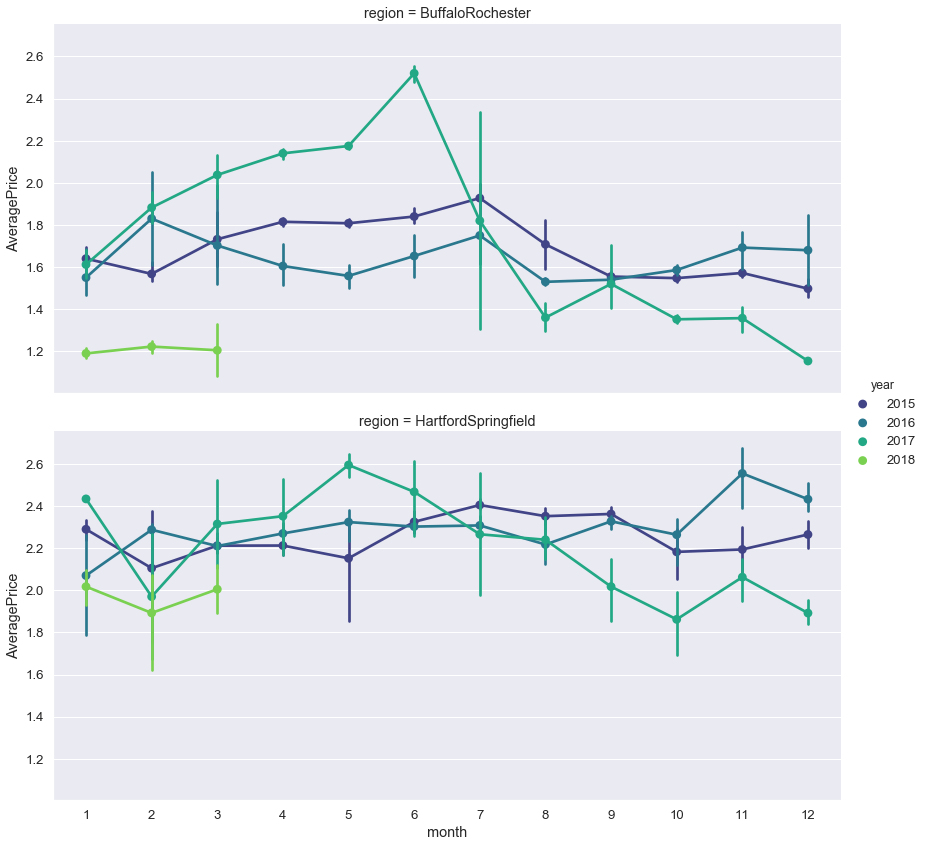

In [13]:
df['month'] = df['Date'].dt.month
orga = df[df['region'].isin(['BuffaloRochester' , 'HartfordSpringfield']) & (df['type']=='organic')]
sns.catplot( data=orga , x="month" , y='AveragePrice' , hue='year' , kind='point' , row = 'region' , height=6 , aspect=2, palette='viridis',)

## nous trions ici le prix moyen de type conventionnel en 2018
#### comme l’autre, nous analysons les villes les plus basses et les plus hautes (Phoenix Tucson et Chicago)

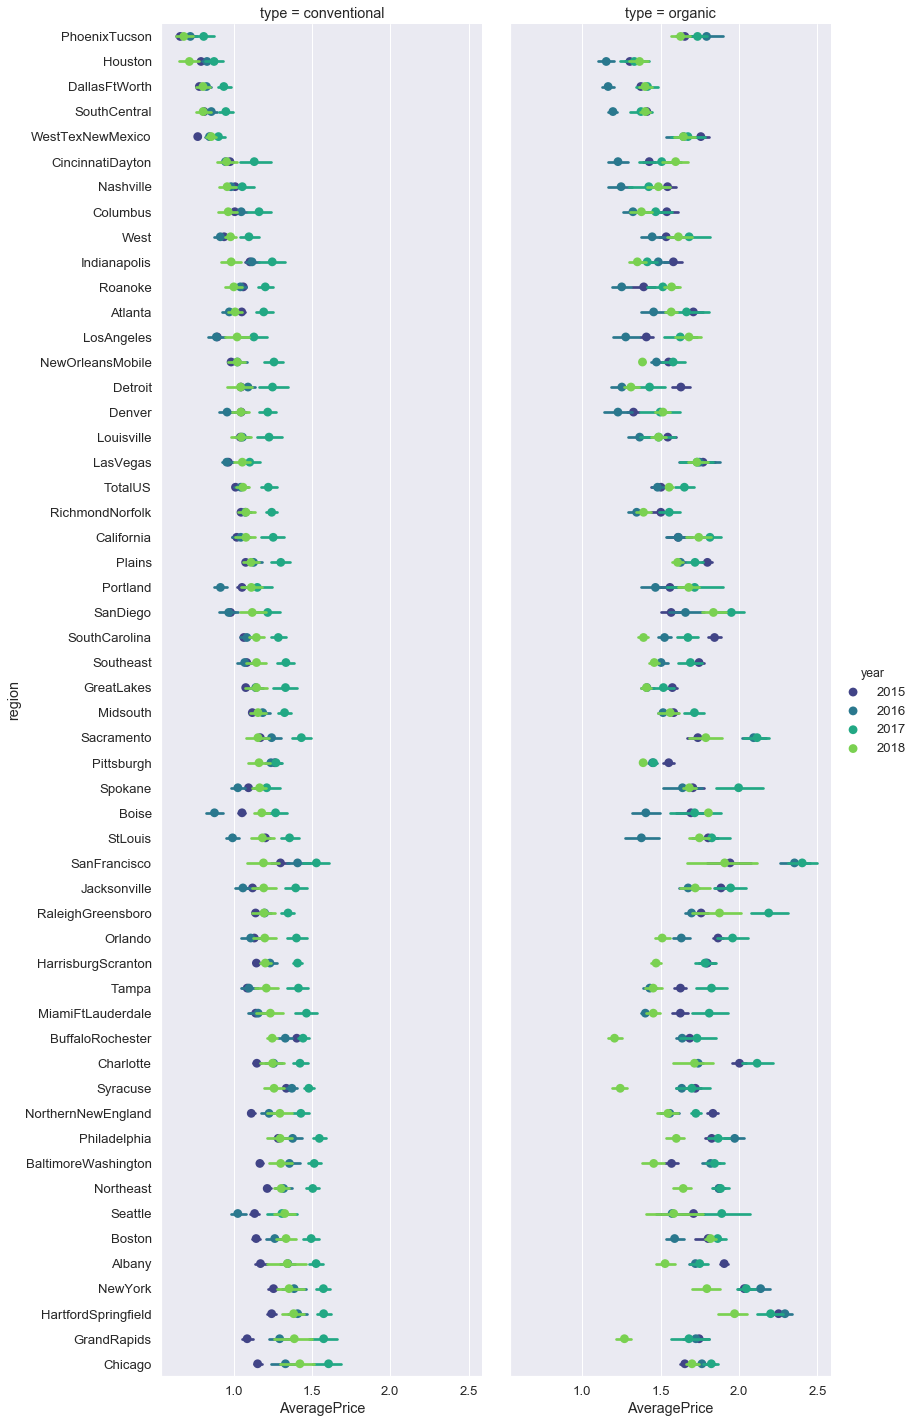

In [14]:
sns.catplot(data=df , x='AveragePrice' , y='region' , col='type' , hue='year' , kind='point' ,
            join=False ,height=20 , aspect=0.3 , 
            order=order_c , palette='viridis',)

#### pour Chicago, l'avocat en 2018 est un peu plus cher que les autres années, pour Phoenix Tucson, le prix est un peu stable

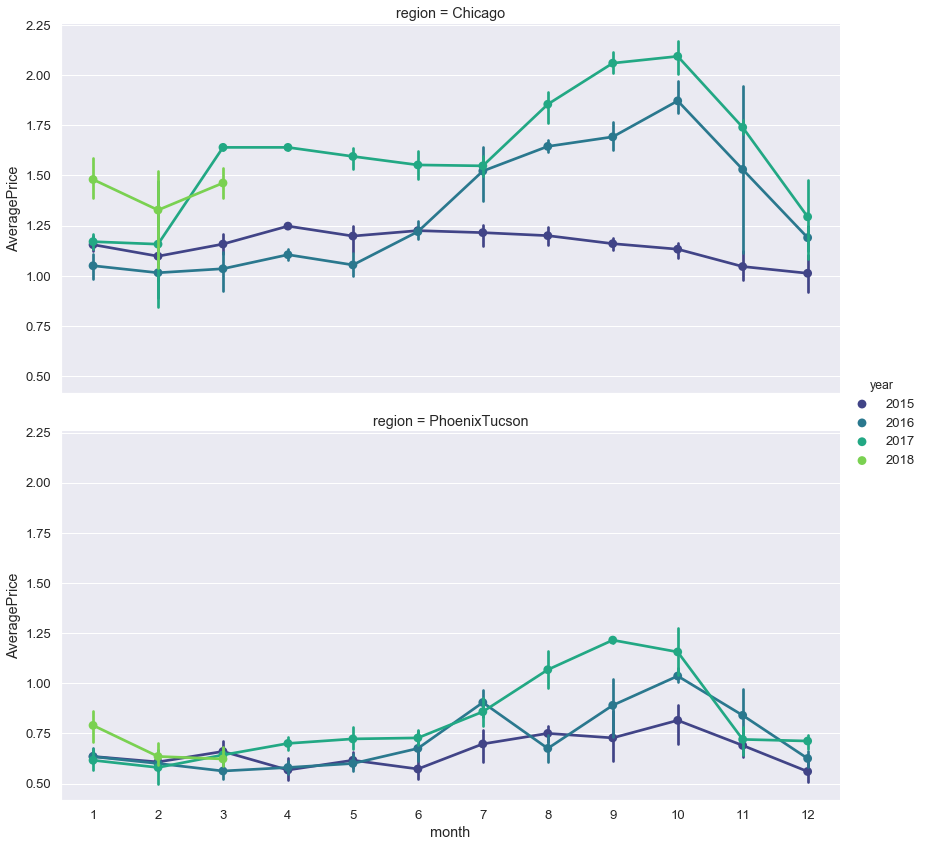

In [15]:
con = df[df['region'].isin(['PhoenixTucson' , 'Chicago']) & (df['type']=='conventional')]
sns.catplot( data=con , x="month" , y='AveragePrice' , hue='year' , kind='point' , row = 'region' , height=6 , aspect=2 , palette='viridis',)

#### En voyant le rapport ci-dessus, et par la logique que le prix plus élevé == meilleur produit, les gens peuvent penser que l'avocat bio est plus vendu que l'avocat traditionnel, mais si nous étudions le volume total, notre opinion pourrait changer.

In [16]:

pd.options.display.float_format = '{:20,.2f}'.format
conve = df[df['type'] == 'conventional'].groupby('year')['Total Volume'].mean()


In [17]:
orga = df[df['type'] == 'organic'].groupby('year')['Total Volume'].mean()


### après avoir regroupé les valeurs par année et pris la moyenne, nous avons obtenu ce tableau,  nous les groupons par moyenne parce que les valeurs totales sont si élevées et si nous comparons les résultats organiques et conventionnels dans le graphique, nous ne verrons pas la barre de valeur organique, et nous avons 9 données manquantes en 2018 pour le mois, donc si nous en prenons le graphique, il semblera que le volume est devenu faible en 2018 .

In [18]:
dfsum = pd.concat([conve , orga] , axis=1)
dfsum.columns = ['conventional' , 'organic']
dfsum

,conventional,organic
year,,
2015,"1,530,127.93","31,659.93"
2016,"1,670,316.88","46,524.24"
2017,"1,665,326.97","58,790.18"
2018,"2,058,959.98","74,895.48"


### nous les regroupons afin qu'il soit plus facile de tracer

In [19]:
nmdfsum = dfsum.reset_index()
nmdfsum = nmdfsum.melt(['year'] , ['conventional' , 'organic'] , 'type' , 'mean')
nmdfsum

,year,type,mean
0,2015,conventional,"1,530,127.93"
1,2016,conventional,"1,670,316.88"
2,2017,conventional,"1,665,326.97"
3,2018,conventional,"2,058,959.98"
4,2015,organic,"31,659.93"
5,2016,organic,"46,524.24"
6,2017,organic,"58,790.18"
7,2018,organic,"74,895.48"


### il semble que le volume moyen n'ait pas changé en 2016 - 2017, alors que le volume d'avocat bio continue a  augmenter

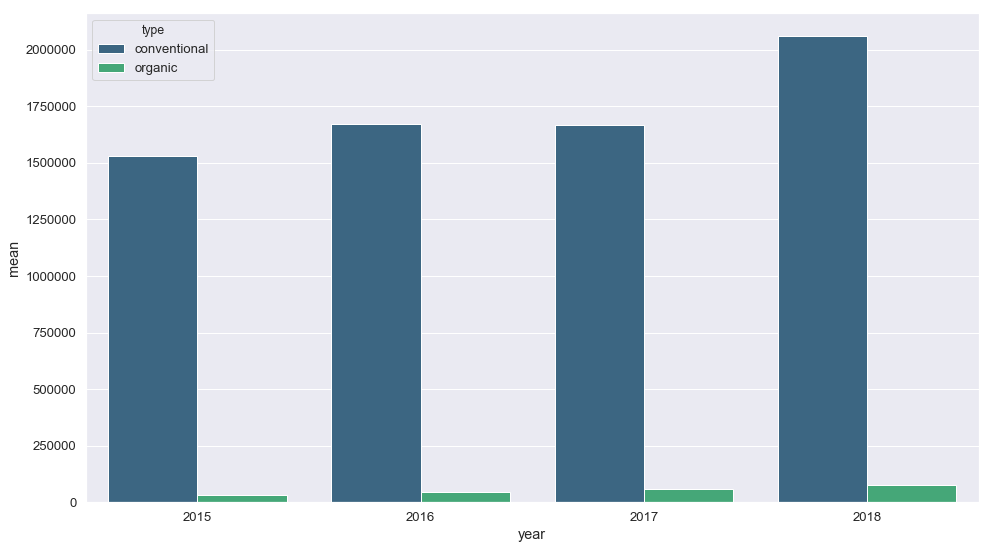

In [20]:
sns.barplot(data=nmdfsum , x='year' , y='mean' , hue='type' , palette='viridis' , )

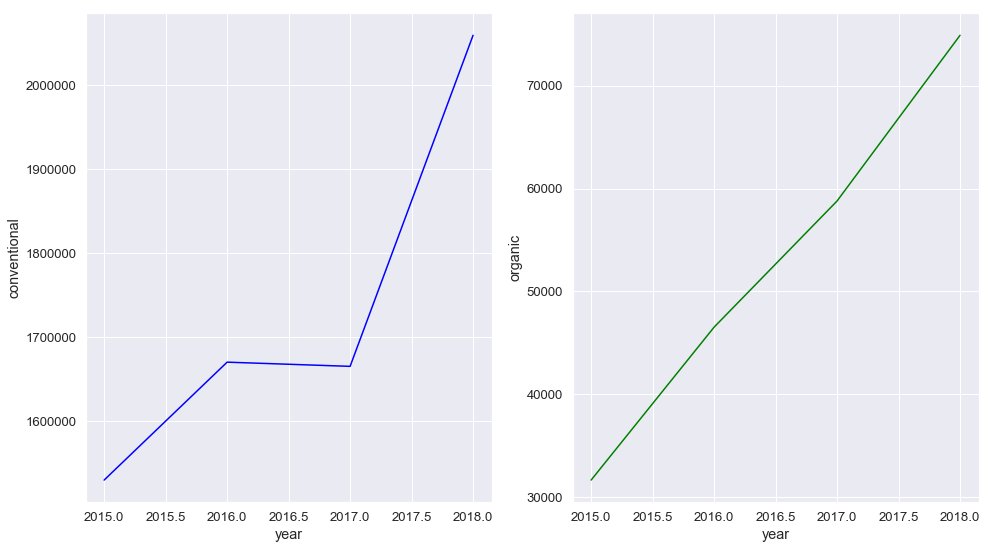

In [21]:
fig , ax = plt.subplots(1,2)
sns.lineplot(data=dfsum.reset_index() , x='year' , y='conventional' , color="Blue" , ax=ax[0] )
sns.lineplot(data=dfsum.reset_index() , x='year' , y='organic' , color="Green" , ax=ax[1] )

### quelques prévisions rapides du prix moyen de l'avocat conventionnel à new york pour 2019
### les points noirs sont les valeurs réelles et la ligne bleue est le prix moyen prédit tandis que la teinte bleue de l'intervalle de confiance

In [22]:
los_c = df[(df['region'] == "NewYork") & (df['type'] == "conventional")]
los_c.reset_index(inplace=True)
los_c = los_c[["Date" , "AveragePrice"]]
los_c= los_c.rename(columns={"Date" : "ds" , "AveragePrice" : "y"})


In [23]:
lc = Prophet()
lc.fit(los_c)
lcfuture = lc.make_future_dataframe(periods=400)
lcforecast = lc.predict(lcfuture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Yasha\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


## Voici un graph qui représente la prévision du prix moyen de l'avocat conventionnel en 2019 et des valeurs manquantes en 2018 à New York

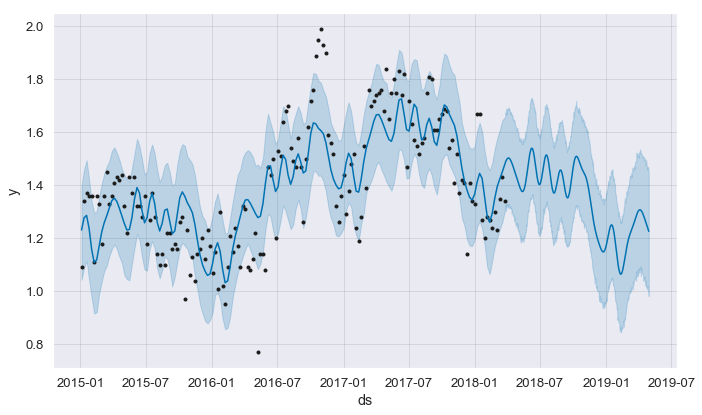

In [24]:
fig5 = lc.plot(lcforecast )

## cette parcelle représente la variation du prix moyen par mois

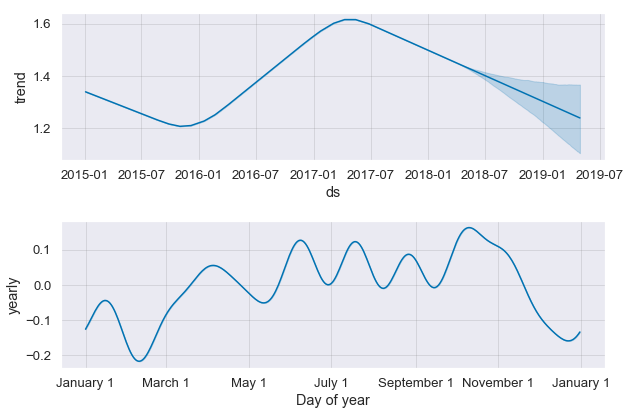

In [25]:
fig6 =lc.plot_components(lcforecast)

## en utilisant un site Web appelé "http://www.producepriceindex.com/", nous pouvons vérifier s'il est correct

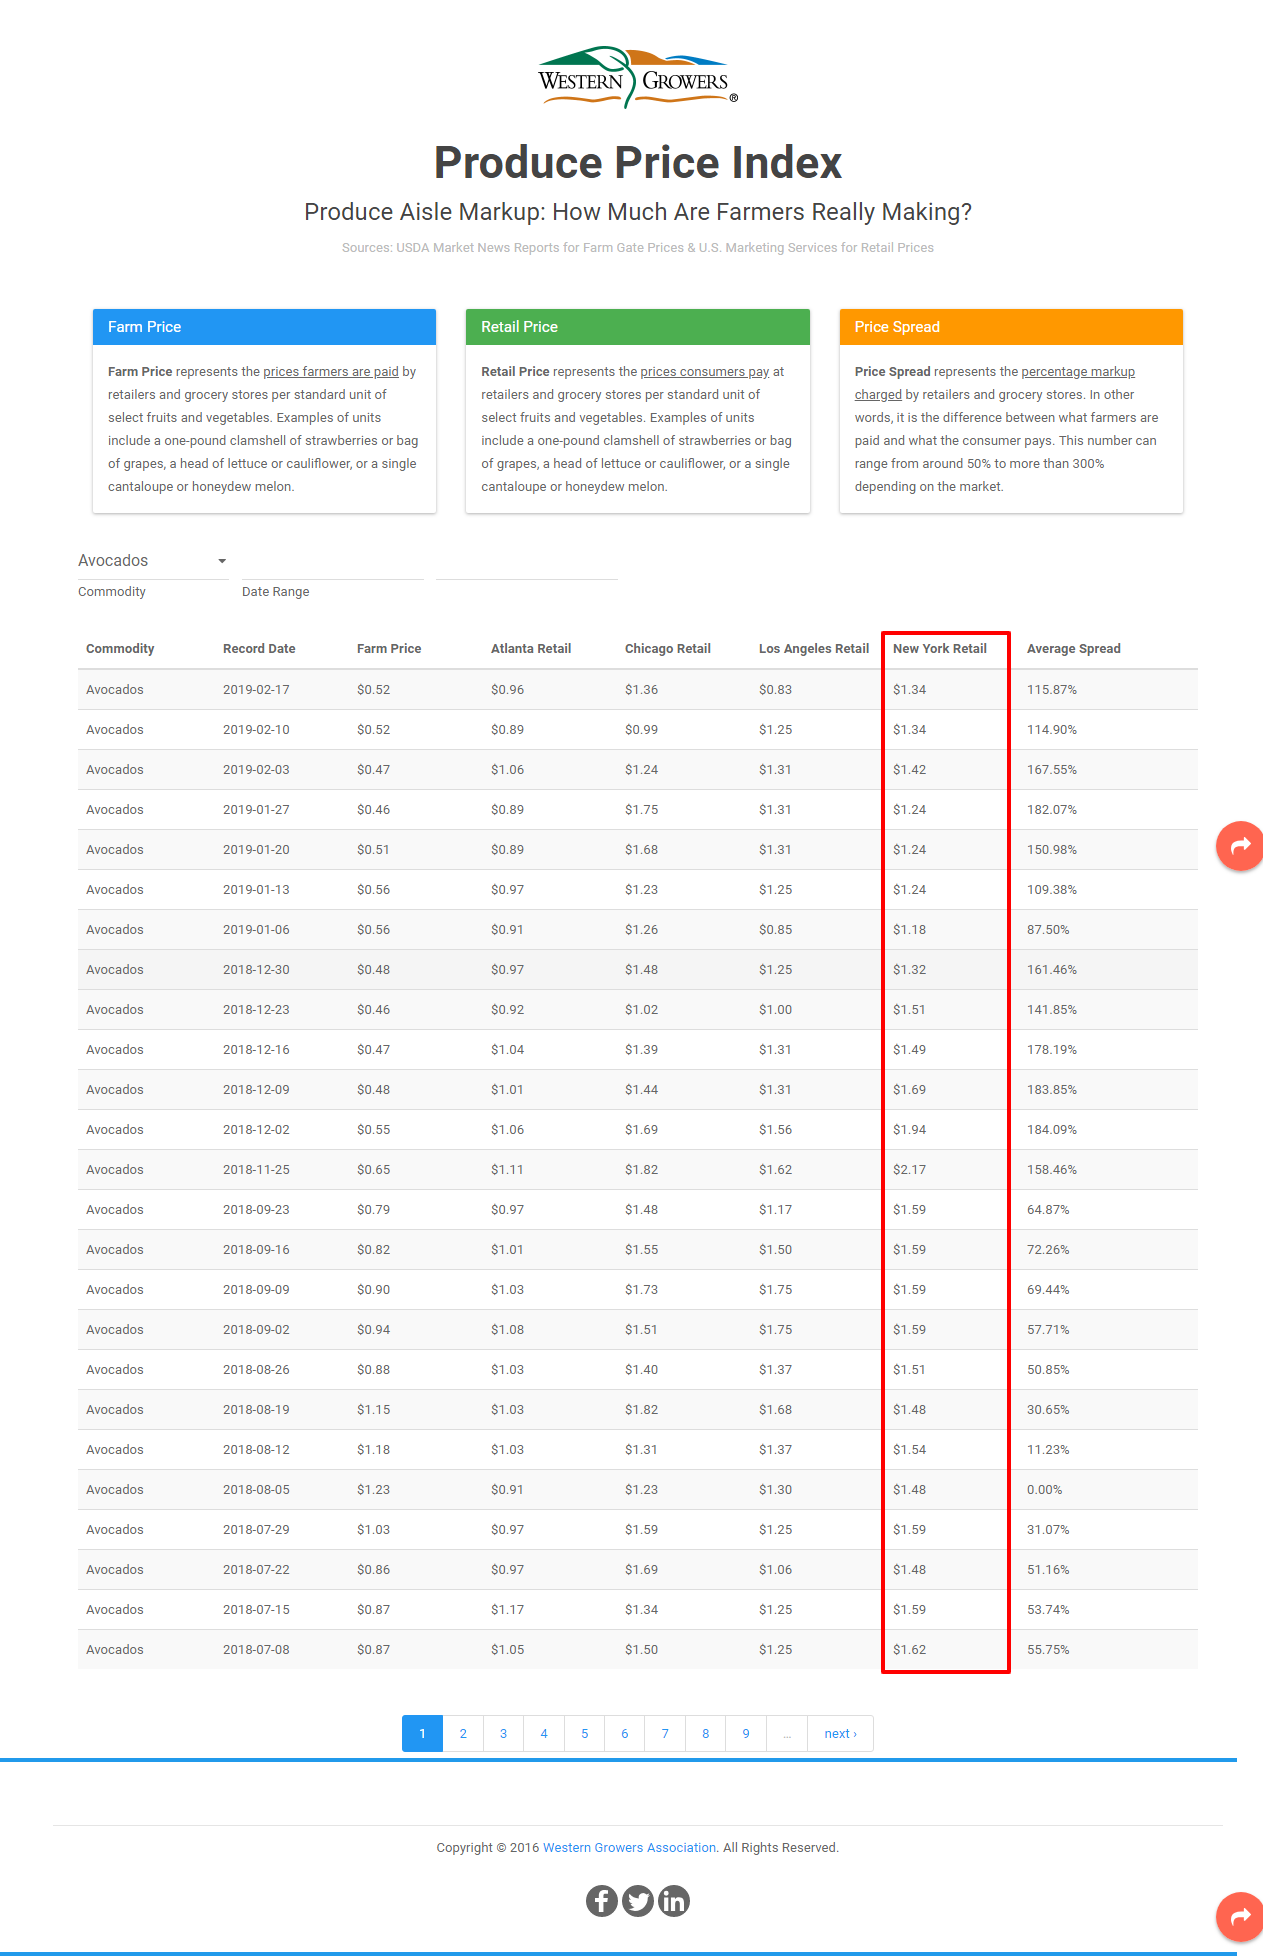

In [26]:
from IPython.display import Image
Image("Produce Price Index.png")

## si nous traçons une partie des prix de new york en 2019, nous constatons que la plupart des valeurs se situent dans l'intervalle de confiance
#### Je ne peux pas tracer tous les points car chaque carré représente 5 mois et je ne peux pas être précis au point de traçage

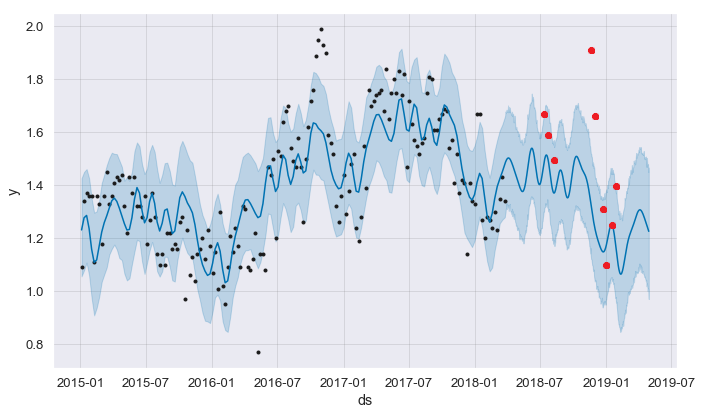

In [27]:
from IPython.display import Image
Image("download (2).png")